In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [30]:
df = pd.read_pickle("/Users/alyssaliu/Desktop/StatsM148/feature_engineered_data.pkl")
print(df.shape)
df.head()

(1665688, 10)


,customer_id,event_count,order_shipped,num_accounts,first_event,last_event,len_journey,days_in_journey,first_stage,last_stage
0,-2147483541,29,0,1,12,1,29,238,1,0
1,-2147481037,13,0,1,12,6,13,0,1,5
2,-2147474335,98,1,1,2,28,98,17,3,6
3,-2147474305,34,0,1,6,21,34,196,5,7
4,-2147472167,104,1,1,12,28,104,19,1,6


In [31]:
y = df['order_shipped']
X = df.drop(['order_shipped', 'customer_id'], axis = 1)

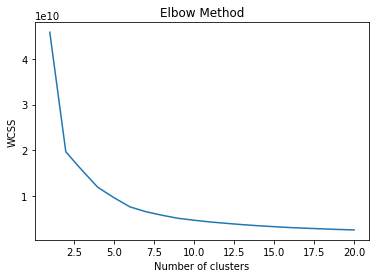

In [32]:
wcss = []
for i in range(1, 21): # Testing 1 to 20 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # inertia_ is the WCSS

# Step 4: Plot the Elbow Curve
plt.plot(range(1, 21), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


## 4 clusters

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_scaled)

# The cluster labels for each data point
labels = kmeans.labels_

# You can add these labels back to your original DataFrame if you wish
df['Cluster'] = labels

In [36]:
df.head()

,customer_id,event_count,order_shipped,num_accounts,first_event,last_event,len_journey,days_in_journey,first_stage,last_stage,Cluster
0,-2147483541,29,0,1,12,1,29,238,1,0,3
1,-2147481037,13,0,1,12,6,13,0,1,5,3
2,-2147474335,98,1,1,2,28,98,17,3,6,4
3,-2147474305,34,0,1,6,21,34,196,5,7,4
4,-2147472167,104,1,1,12,28,104,19,1,6,1


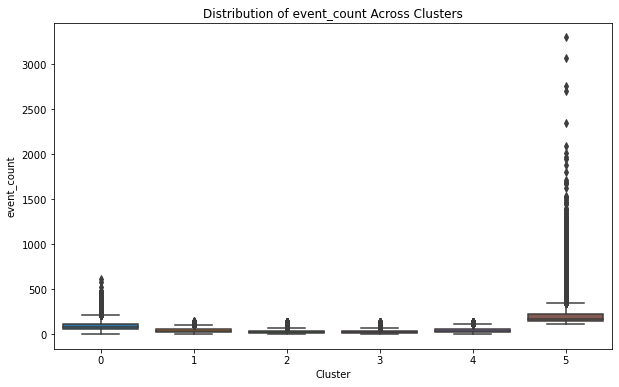

In [37]:
# Choose a feature to plot
feature_to_plot = 'event_count'

plt.figure(figsize=(10,6))
sns.boxplot(x='Cluster', y=feature_to_plot, data=df)
plt.title(f'Distribution of {feature_to_plot} Across Clusters')
plt.show()

In [38]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=X_scaled.columns)
print(centers)

   event_count  num_accounts  first_event  last_event  len_journey   
0     1.079604      4.774155     0.041049   -0.100187     1.079604  \
1    -0.004969     -0.204254     0.741198    1.226301    -0.004969   
2    -0.264679     -0.204254    -0.827484   -0.652677    -0.264679   
3    -0.296249     -0.204254     0.468020   -0.561103    -0.296249   
4     0.001373     -0.204254    -0.826731    0.627753     0.001373   
5     3.464978      0.088342    -0.075100    0.337625     3.464978   

   days_in_journey  first_stage  last_stage  
0         0.117312    -0.019178    0.005307  
1        -0.217091    -0.586824    1.012935  
2         0.417533     0.963817   -1.077855  
3        -0.120018    -0.677951   -0.435097  
4        -0.074244     0.997490    0.960367  
5         0.427084    -0.043778    0.408348  


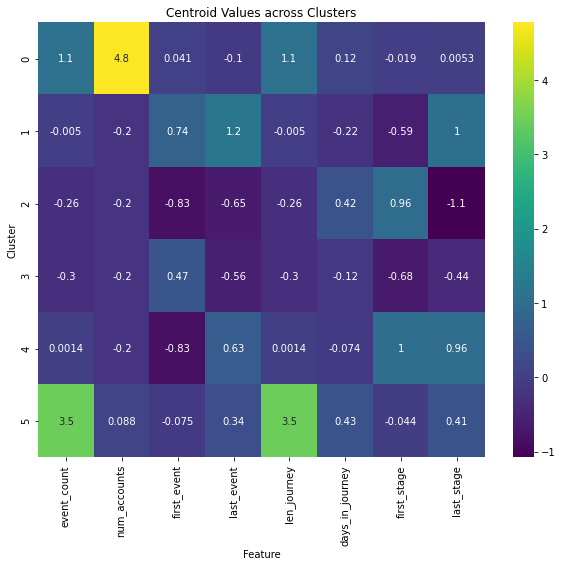

In [39]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(centers, annot=True, cmap='viridis')
plt.title('Centroid Values across Clusters')
plt.xlabel('Feature')
plt.ylabel('Cluster')
plt.show()

In [40]:
df.head()

,customer_id,event_count,order_shipped,num_accounts,first_event,last_event,len_journey,days_in_journey,first_stage,last_stage,Cluster
0,-2147483541,29,0,1,12,1,29,238,1,0,3
1,-2147481037,13,0,1,12,6,13,0,1,5,3
2,-2147474335,98,1,1,2,28,98,17,3,6,4
3,-2147474305,34,0,1,6,21,34,196,5,7,4
4,-2147472167,104,1,1,12,28,104,19,1,6,1


In [53]:
cluster_0 = df[df['Cluster'] == 0]
cluster_0_cust = cluster_0['customer_id'].to_list()
print(cluster_0.shape)

(64918, 11)


In [54]:
cluster_1 = df[df['Cluster'] == 1]
cluster_1_cust = cluster_1['customer_id'].to_list()
print(cluster_1.shape)

(288610, 11)


In [55]:
cluster_2 = df[df['Cluster'] == 2]
cluster_2_cust = cluster_2['customer_id'].to_list()
print(cluster_2.shape)

(309719, 11)


In [56]:
cluster_3 = df[df['Cluster'] == 3]
cluster_3_cust = cluster_3['customer_id'].to_list()
print(cluster_3.shape)

(637053, 11)


In [57]:
cluster_4 = df[df['Cluster'] == 4]
cluster_4_cust = cluster_4['customer_id'].to_list()
print(cluster_4.shape)

(307288, 11)


## Inspecting entire dataframe per cluster

In [58]:
df_whole = pd.read_pickle("/Users/alyssaliu/Desktop/StatsM148/wide_format_data.pkl")

In [75]:
cluster_1_df = df_whole[df_whole['customer_id'].isin(cluster_1_cust)]
cluster_2_df = df_whole[df_whole['customer_id'].isin(cluster_2_cust)]
cluster_3_df = df_whole[df_whole['customer_id'].isin(cluster_3_cust)]
cluster_4_df = df_whole[df_whole['customer_id'].isin(cluster_4_cust)]

In [76]:
cluster_1_df.head()

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
4,-2147472167,[889210381],"[12, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...","[application_web_approved, application_web_vie...","[2023-02-19 08:23:54+00:00, 2023-02-19 14:21:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
32,-2147395611,[674764100],"[29, 2, 12, 4, 4, 4, 4, 4, 11, 4, 4, 11, 4, 5,...","[account_activitation, campaign_click, applica...","[2021-06-15 00:00:00+00:00, 2021-06-15 06:00:0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
33,-2147395574,[-1424373728],"[12, 1, 4, 4, 11, 19, 5, 6, 5, 6, 1, 1, 1, 5, ...","[application_web_approved, promotion_created, ...","[2021-09-09 07:24:48+00:00, 2021-09-09 07:25:1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
37,-2147392179,[1388722474],"[19, 19, 19, 19, 19, 19, 3, 19, 12, 19, 4, 4, ...","[application_web_view, application_web_view, a...","[2021-01-05 21:53:03+00:00, 2021-01-05 21:53:0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
56,-2147348925,[1046707130],"[12, 24, 24, 24, 1, 4, 4, 11, 1, 1, 5, 4, 4, 4...","[application_web_approved, campaignemail_click...","[2021-10-09 09:01:28+00:00, 2021-10-09 18:26:2...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


In [80]:
def create_flow_counts(df):
    # Initialize an empty list to store the source-target pairs
    source_target_pairs = []

    # Iterate over each list in the DataFrame
    for path in df['event_name']:
        # Extract pairs from each list
        pairs = [(path[i], path[i+1]) for i in range(len(path)-1)]
        source_target_pairs.extend(pairs)

    # Convert the pairs into a DataFrame
    pairs_df = pd.DataFrame(source_target_pairs, columns=['source', 'target'])
    
    # Aggregate and count the frequency of each pair
    flow_counts = pairs_df.groupby(['source', 'target']).size().reset_index(name='value')
    
    # Create lists of unique sources and targets to define nodes
    all_nodes = list(set(flow_counts['source']).union(set(flow_counts['target'])))
    node_dict = {node: i for i, node in enumerate(all_nodes)}

    # Map sources and targets to their respective indices
    flow_counts['source_id'] = flow_counts['source'].map(node_dict)
    flow_counts['target_id'] = flow_counts['target'].map(node_dict)
    
    return flow_counts

In [81]:
clust_1_flow_counts = create_flow_counts(cluster_1_df)
clust_2_flow_counts = create_flow_counts(cluster_2_df)
clust_3_flow_counts = create_flow_counts(cluster_3_df)
clust_4_flow_counts = create_flow_counts(cluster_4_df)

In [82]:
clust_1_flow_counts

,source,target,value,source_id,target_id
0,account_activitation,account_activitation,12,24,24
1,account_activitation,account_downpaymentcleared,38810,24,11
2,account_activitation,account_downpaymentreceived,947,24,20
3,account_activitation,add_to_cart,1849,24,19
4,account_activitation,application_phone_approved,1968,24,0
...,...,...,...,...,...
486,view_cart,place_order_web,4490,16,4
487,view_cart,pre-application_(3rd_party_affiliates),192,16,10
488,view_cart,promotion_created,44169,16,25
489,view_cart,site_registration,1152,16,17


In [72]:
import plotly.graph_objects as go


# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_nodes,
    ),
    link=dict(
        source=flow_counts['source_id'],
        target=flow_counts['target_id'],
        value=flow_counts['value']
    )
)])

fig.update_layout(title_text="Example Sankey Diagram", font_size=10)
fig.show()
